# NEW YORK CITY TAXI TRIP DURATION

## Data Fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor    
                     because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and   
                     forward trip

trip_duration - duration of the trip in seconds, target variable

## Exploratory Data Analysis & Feature Engineering

### Library / Data Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv(r'D:\data set\newyork trip duration\train.csv')

In [3]:
data.shape

(1458644, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [8]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [9]:
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

In [10]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [11]:
data['pickup_month'] = pd.DatetimeIndex(data['pickup_datetime']).month
data['dropoff_month'] = pd.DatetimeIndex(data['dropoff_datetime']).month

In [12]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3


In [13]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_month                   int64
dropoff_month                  int64
dtype: object

In [14]:
data.pickup_day.value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [15]:
data.dropoff_day.value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

In [16]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.516818e+00,3.517178e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,1.681038e+00,1.681217e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,2.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,4.000000e+00,4.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.000000e+00,5.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,6.000000e+00,7.000000e+00


### Further Graphical Analysis

In [17]:
#count plot for 'passenger_count'

Text(0.5, 1.0, ' Dist of passenger count')

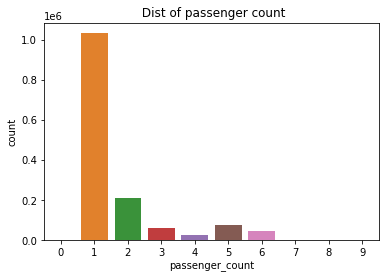

In [18]:
ax = sns.countplot(x = data.passenger_count)
plt.title(' Dist of passenger count')

In [19]:
#count plot for 'pickup_day'

Text(0.5, 1.0, ' Dist of pickup_day')

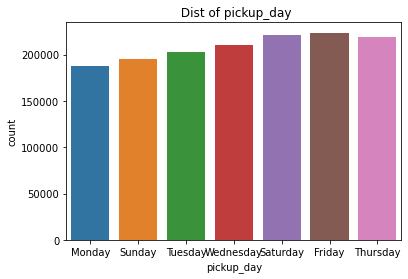

In [20]:
ax1 = sns.countplot(x = data.pickup_day)
plt.title(' Dist of pickup_day')

In [21]:
#count plot for 'dropoff_day'

Text(0.5, 1.0, ' Dist of dropoff_day')

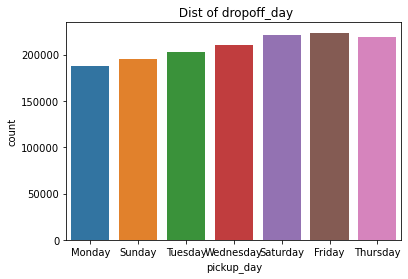

In [22]:
ax2 = sns.countplot(x = data.pickup_day)
plt.title(' Dist of dropoff_day')

C:\Users\Priti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

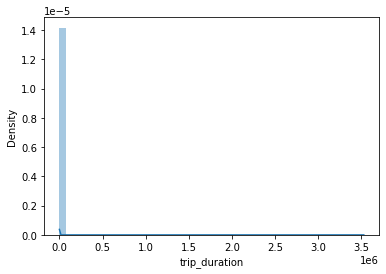

In [23]:
# trip_Duration distribution

x = data.trip_duration

sns.distplot(x)

In [24]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3


In [25]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

In [26]:
import datetime

In [27]:
data['pickup_timezone']=data['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data['dropoff_timezone']=data['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


In [28]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,midday,midday


In [29]:
#count plot for 'pickup_timezone'

Text(0.5, 1.0, ' Dist of pickup_timezone ')

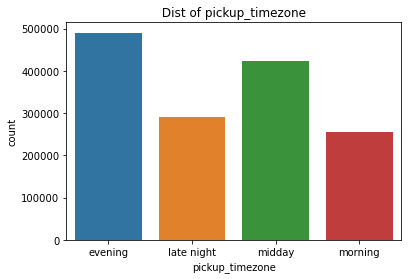

In [30]:
ax3 = sns.countplot(x = data.pickup_timezone)
plt.title(' Dist of pickup_timezone ')

In [31]:
#count plot for 'dropoff_timezone'

Text(0.5, 1.0, ' Dist of dropoff_timezone ')

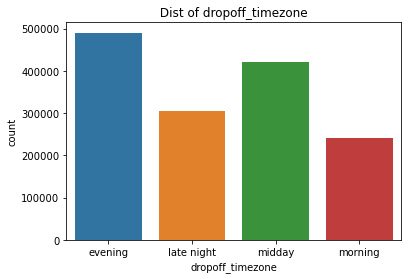

In [32]:
ax4 = sns.countplot(x = data.dropoff_timezone)
plt.title(' Dist of dropoff_timezone ')

<AxesSubplot:>

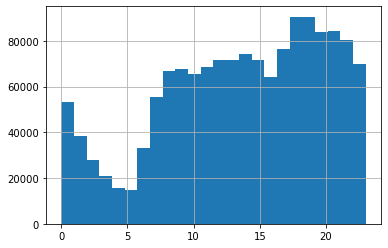

In [33]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data.pickup_hour.hist(bins = 24)

<AxesSubplot:>

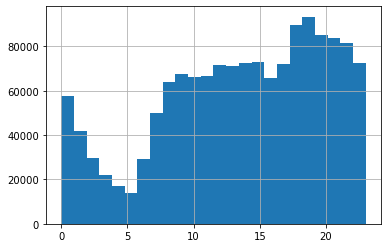

In [34]:
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data.dropoff_hour.hist(bins = 24)

In [35]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,evening,evening,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,late night,late night,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,midday,midday,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,evening,evening,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,midday,midday,13,13


In [36]:
#count plot for 'pickup_month'

Text(0.5, 1.0, ' Dist of pickup_month ')

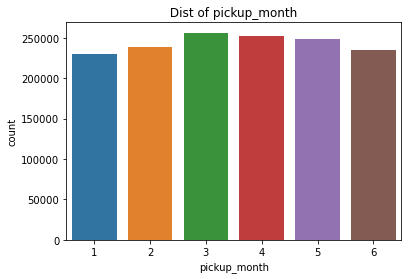

In [37]:
ax4 = sns.countplot(x = data.pickup_month)
plt.title(' Dist of pickup_month ')

In [38]:
#count plot for 'dropoff_month'

Text(0.5, 1.0, ' Dist of dropoff_month ')

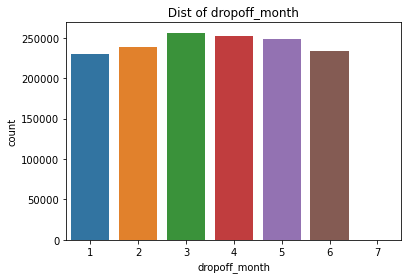

In [39]:
ax5 = sns.countplot(x = data.dropoff_month)
plt.title(' Dist of dropoff_month ')

Text(0.5, 1.0, ' Dist of total pickup_hour')

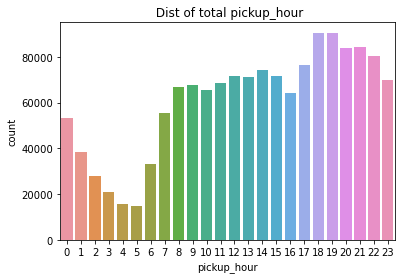

In [40]:
ax6 = sns.countplot(x = data.pickup_hour)
plt.title(' Dist of total pickup_hour')

Text(0.5, 1.0, ' Dist of total dropoff_hour')

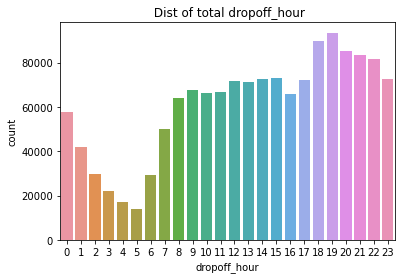

In [41]:
ax7 = sns.countplot(x = data.dropoff_hour)
plt.title(' Dist of total dropoff_hour')

# Data Cleaning

In [42]:
data = pd.read_csv(r'D:\data set\newyork trip duration\train.csv')

In [43]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [44]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [45]:
data.columns[data.dtypes=='object']

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [46]:
data.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [47]:
data.store_and_fwd_flag.replace({'N':0,'Y':1},inplace=True)

In [48]:
data=data.drop({'id','pickup_datetime','dropoff_datetime'},axis=1)

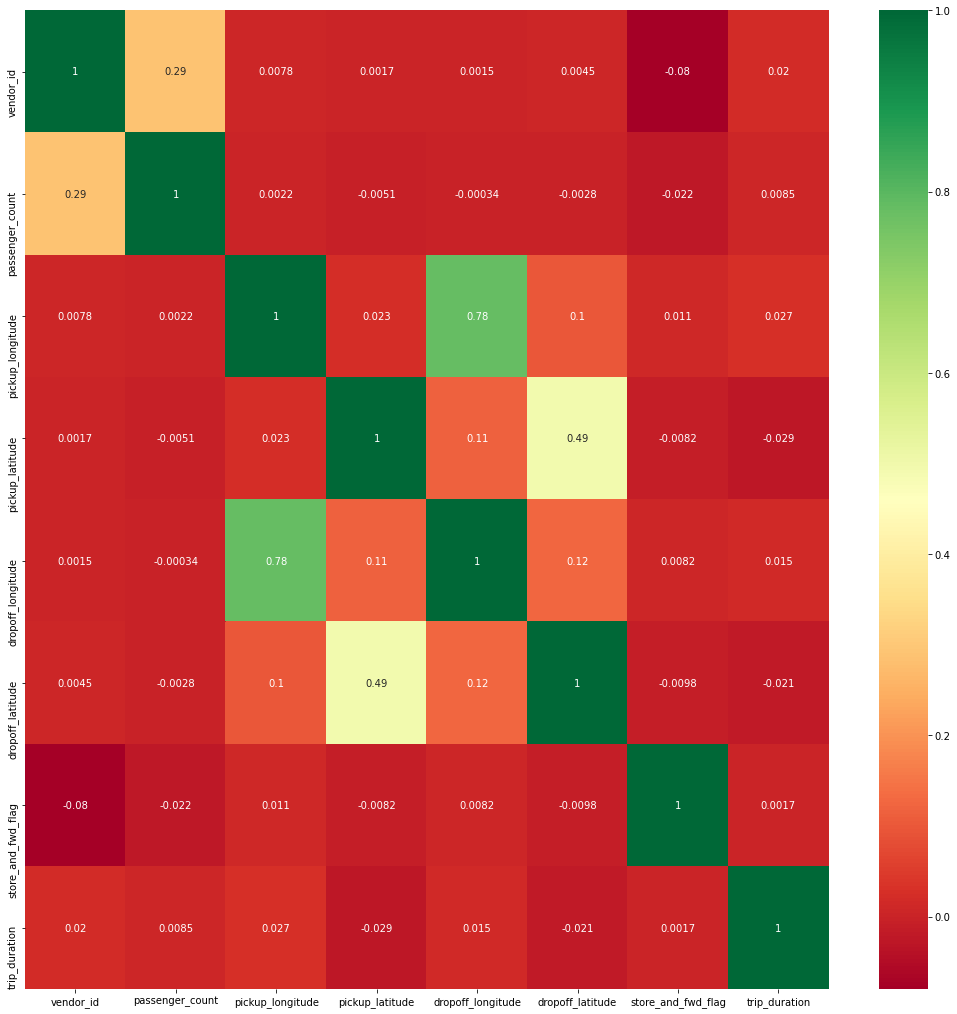

In [88]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [49]:
data.shape

(1458644, 8)

In [50]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [51]:
data_x=data.drop({'trip_duration'},axis=1)
data_x.head(1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,1,-73.982155,40.767937,-73.96463,40.765602,0


In [52]:
data_y=data.trip_duration

# data cleaning-test data

In [53]:
test = pd.read_csv(r'D:\data set\newyork trip duration\test.csv')

In [54]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [55]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [57]:
test.columns[test.dtypes=='object']

Index(['id', 'pickup_datetime', 'store_and_fwd_flag'], dtype='object')

In [58]:
test.store_and_fwd_flag.replace({'N':0,'Y':1},inplace=True)

In [59]:
test=test.drop({'id','pickup_datetime'},axis=1)

In [60]:
test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,1,-73.988129,40.732029,-73.990173,40.756680,0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,0
3,2,1,-73.956070,40.771900,-73.986427,40.730469,0
4,1,1,-73.970215,40.761475,-73.961510,40.755890,0


In [61]:
test.shape

(625134, 7)

In [62]:
data.shape

(1458644, 8)

# model building

In [63]:
def remove_outliers(df,col,k):   
        mean = df[col].mean()
        global df1
        sd = df[col].std()    
        final_list = [x for x in df[col] if (x > mean - k * sd)]
        final_list = [x for x in final_list if (x < mean + k * sd)]       
        df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
        print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [64]:
remove_outliers(data,'trip_duration',2)

(1456540, 8)
Number of outliers removed == > 2104


In [65]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [66]:
data_y

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [67]:
model_lin=linreg.fit(data_x,data_y)

In [68]:
pred_lin=model_lin.predict(test)

In [69]:
Rsquare=linreg.score(data_x,data_y)
Rsquare

0.0021411113979179497

In [70]:
K=data_x.shape[1]
N=data_x.shape[0]
AdjRsquare  = 1  -   (1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare 

0.0021363226691192283

###  Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()

In [72]:
model_rfc=rfc.fit(data_x,data_y)

In [73]:
pred_rfc=model_rfc.predict(test)

In [74]:
Rsquare=model_rfc.score(data_x,data_y)
Rsquare

0.8389965795341701

In [75]:
K=data_x.shape[1]
N=data_x.shape[0]
AdjRsquare  = 1  -   (1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare 

0.838995806878111

In [76]:
pred_train=model_rfc.predict(data_x)

In [83]:
err_train=(data_y-pred_train)
#err_train

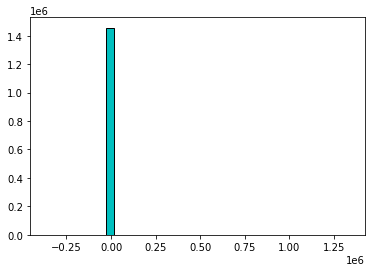

In [89]:
plt.hist(err_train,bins=40,edgecolor='black',color='c');

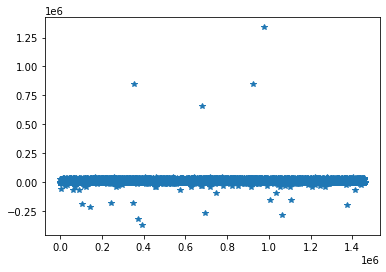

In [90]:
plt.plot(err_train,"*");

In [91]:
pred_actual = pd.DataFrame({'Actual' :data_y   , 'Predicted' : pred_train})
pred_actual

,Actual,Predicted
0,455,549.63
1,663,633.38
2,2124,2837.41
3,429,457.80
4,435,401.83
...,...,...
1458639,778,1555.35
1458640,655,817.65
1458641,764,893.42
1458642,373,400.70


C:\Users\Priti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


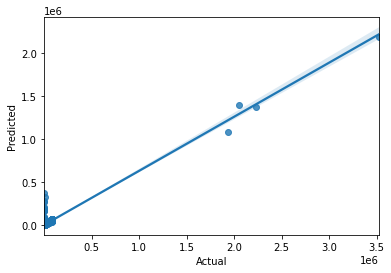

In [92]:
sns.regplot('Actual','Predicted',data=pred_actual);


In [93]:
from sklearn.metrics import *

In [95]:
mape=mean_absolute_percentage_error(data_y,pred_train)
mape

0.2764584701834782

In [97]:
mse=mean_squared_error(data_y,pred_train)
mse

4416432.060046495

In [99]:
rmse=np.sqrt(mse)
rmse

2101.5308848661957

In [100]:
np.mean(err_train)

-10.118986547542162

In [101]:
np.max(err_train)

1339036.2799999998

In [102]:
np.median(err_train)

-21.40000000000005

C:\Users\Priti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

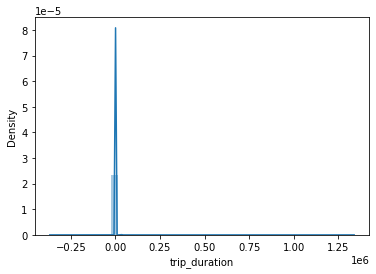

In [103]:
sns.distplot(a=err_train,bins=40)

###  Feature Selection by Random Forest Regressor

In [77]:
Feature_imp =pd.DataFrame({'column_name':data_x.columns,'feature_imp':model_rfc.feature_importances_})

In [78]:
Feature_imp.sort_values('feature_imp',ascending=False)

,column_name,feature_imp
2,pickup_longitude,0.319491
4,dropoff_longitude,0.239086
5,dropoff_latitude,0.217123
3,pickup_latitude,0.190285
1,passenger_count,0.030829
0,vendor_id,0.003162
6,store_and_fwd_flag,0.000023


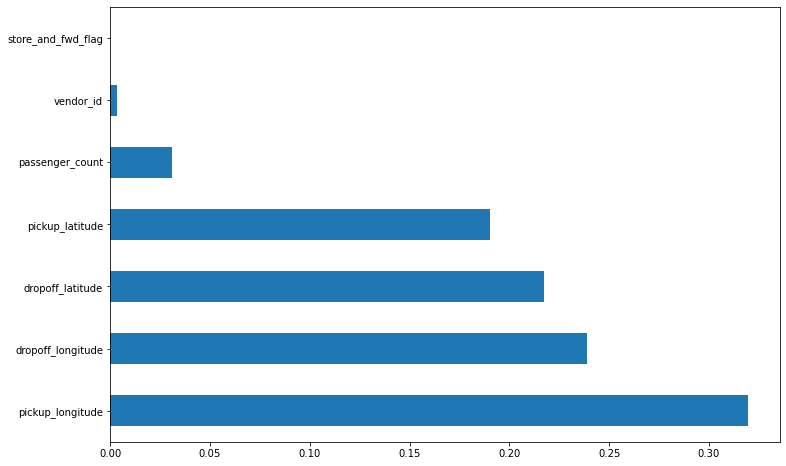

In [80]:
plt.figure(figsize = (12,8))
Feature_imp= pd.Series(model_rfc.feature_importances_, index=data_x.columns)
Feature_imp.nlargest(20).plot(kind='barh')
plt.show()